<a href="https://colab.research.google.com/github/der-himmel/obr-iz/blob/main/obr_iz_pz5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class SimpleConvNet(nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=9)
        self.pool = nn.MaxPool2d(kernel_size=4, stride=2)
        self.fc1 = nn.Linear(in_features=121, out_features=10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))

        x = torch.flatten(x, 1)

        x = self.fc1(x)

        return x


net = SimpleConvNet()
print(net)

SimpleConvNet(
  (conv1): Conv2d(3, 1, kernel_size=(9, 9), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=4, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=121, out_features=10, bias=True)
)


In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class BetterNet(nn.Module):
    def __init__(self):
        super(BetterNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)  # 16 фильтров 3x3
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 32 фильтра 3x3
        self.bn2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)  # Уменьшено количество нейронов
        self.fc2 = nn.Linear(128, 10)  # Выходной слой

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = BetterNet()
print(net)

BetterNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ImprovedConvNet(nn.Module):
    def __init__(self):
        super(ImprovedConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32 * 32 * 32, 10)
    def forward(self, x):
        x = self.dropout(self.bn1(F.relu(self.conv1(x))))
        x = x.view(-1, 32 * 32 * 32)
        x = self.fc1(x)

        return x

net = ImprovedConvNet()
print(net)

ImprovedConvNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=32768, out_features=10, bias=True)
)


In [26]:
example = torch.rand(1, 3, 32, 32)
net(example).shape
print(example)

tensor([[[[0.1204, 0.3997, 0.7345,  ..., 0.1101, 0.5477, 0.2468],
          [0.6065, 0.0897, 0.5704,  ..., 0.8252, 0.9704, 0.0098],
          [0.9997, 0.7728, 0.0497,  ..., 0.7174, 0.4625, 0.1895],
          ...,
          [0.4388, 0.9683, 0.1034,  ..., 0.1731, 0.3390, 0.9251],
          [0.4193, 0.2274, 0.8961,  ..., 0.9778, 0.2037, 0.7619],
          [0.3158, 0.9036, 0.4969,  ..., 0.7695, 0.0170, 0.9607]],

         [[0.3560, 0.4614, 0.3567,  ..., 0.1944, 0.7944, 0.7190],
          [0.3363, 0.6041, 0.8391,  ..., 0.5657, 0.9264, 0.9303],
          [0.7454, 0.2568, 0.9648,  ..., 0.9658, 0.5792, 0.1972],
          ...,
          [0.9287, 0.9809, 0.9160,  ..., 0.1982, 0.5622, 0.3862],
          [0.2270, 0.8317, 0.0035,  ..., 0.3909, 0.3727, 0.5288],
          [0.0918, 0.7286, 0.7326,  ..., 0.4128, 0.6051, 0.3506]],

         [[0.0387, 0.7655, 0.6777,  ..., 0.6865, 0.0641, 0.0067],
          [0.0314, 0.5241, 0.1895,  ..., 0.6847, 0.6558, 0.3344],
          [0.6034, 0.6762, 0.4786,  ..., 0

Выходная размерность тензора после сверточного слоя: 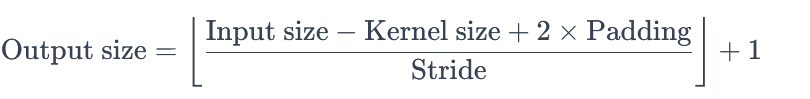

Выходная размерность тензора посте пулинга: 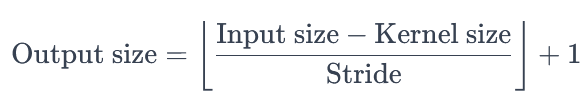

# Параметры обучения сети

In [33]:
NUMBER_OF_EPOCHS = 35
LR = 0.01

# Обучение сети

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np

In [40]:
def calculate_metrics(loader, model):
    y_true = []
    y_pred = []
    model.eval()
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.numpy())
            y_true.extend(labels.numpy())

    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, recall, precision, f1

transform = transforms.Compose([transforms.RandomRotation(10), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
valset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=256, shuffle=True)
valloader = DataLoader(valset, batch_size=256, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [41]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9) #для SimpleConvNet
# optimizer = optim.Adam(net.parameters(), lr=0.005) #для BetterNet


for epoch in range(NUMBER_OF_EPOCHS):
    running_loss = 0.0
    net.train()
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader):.3f}')

    train_acc, train_rec, train_prec, train_f1 = calculate_metrics(trainloader, net)
    print(f'Training - Accuracy: {train_acc}, Recall: {train_rec}, Precision: {train_prec}, F1 Score: {train_f1}')

    val_acc, val_rec, val_prec, val_f1 = calculate_metrics(valloader, net)
    print(f'Validation - Accuracy: {val_acc}, Recall: {val_rec}, Precision: {val_prec}, F1 Score: {val_f1}')

    if val_f1 >= 0.6:
        print("ВЫПОЛНЕНО")
        break

print('Finished training on spcified number of epochs')

Epoch 1, Loss: 2.130
Training - Accuracy: 0.531, Recall: 0.5309999999999999, Precision: 0.5505677286286259, F1 Score: 0.5355570761046284
Validation - Accuracy: 0.506, Recall: 0.506, Precision: 0.5245724836023588, F1 Score: 0.5106687730241766
Epoch 2, Loss: 1.376
Training - Accuracy: 0.55586, Recall: 0.55586, Precision: 0.5569184965153731, F1 Score: 0.5479931764230974
Validation - Accuracy: 0.5397, Recall: 0.5397, Precision: 0.5404267642945139, F1 Score: 0.5309556635571712
Epoch 3, Loss: 1.325
Training - Accuracy: 0.5613, Recall: 0.5612999999999999, Precision: 0.5626137667931898, F1 Score: 0.5530798348179438
Validation - Accuracy: 0.5377, Recall: 0.5377, Precision: 0.5357858353887742, F1 Score: 0.5288226473649071
Epoch 4, Loss: 1.286
Training - Accuracy: 0.5904, Recall: 0.5904, Precision: 0.5998325910321022, F1 Score: 0.5887782789227436
Validation - Accuracy: 0.5622, Recall: 0.5622, Precision: 0.5679772992752897, F1 Score: 0.5593380785623159
Epoch 5, Loss: 1.258
Training - Accuracy: 0.5